## Image Recognition/Classification with CIFAR-10

In [ ]:
 #pip install tensorflow-cpu==2.13.0 numpy==1.24.3 Pillow==10.4.0

In [1]:
# importing required libraries
import os
import numpy as np
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('CPU'))

TensorFlow version: 2.13.0
Is GPU available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
# Create data folder using pathlib
data_folder = Path("cifar10_data")
data_folder.mkdir(exist_ok=True)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Save all data arrays in one loop
for name, data in [
    ("x_train", x_train),
    ("y_train", y_train),
    ("x_test", x_test),
    ("y_test", y_test)
]:
    np.save(data_folder / f"{name}.npy", data)
print(f"CIFAR-10 data saved to folder: {data_folder}")

170498071/170498071 [==============================] - 11s 0us/step
CIFAR-10 data saved to folder: cifar10_data


In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define the CNN model
def create_model():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [6]:
# Create and compile the model
model = create_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Define callbacks
checkpoint_path = "best_model.h5"
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        save_best_only=True,
        monitor='val_accuracy'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

In [8]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=96,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
417/417 [==============================] - 370s 878ms/step - loss: 1.7004 - accuracy: 0.4373 - val_loss: 3.0233 - val_accuracy: 0.2372 - lr: 0.0010
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


417/417 [==============================] - 367s 879ms/step - loss: 1.0905 - accuracy: 0.6133 - val_loss: 1.0391 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 3/30
417/417 [==============================] - 394s 944ms/step - loss: 0.8951 - accuracy: 0.6861 - val_loss: 0.8697 - val_accuracy: 0.7026 - lr: 0.0010
Epoch 4/30
417/417 [==============================] - 361s 867ms/step - loss: 0.7859 - accuracy: 0.7219 - val_loss: 0.8000 - val_accuracy: 0.7228 - lr: 0.0010
Epoch 5/30
417/417 [==============================] - 362s 869ms/step - loss: 0.7123 - accuracy: 0.7488 - val_loss: 0.7678 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 6/30
417/417 [==============================] - 382s 917ms/step - loss: 0.6499 - accuracy: 0.7725 - val_loss: 0.6540 - val_accuracy: 0.7746 - lr: 0.0010
Epoch 7/30
417/417 [==============================] - 360s 864ms/step - loss: 0.6139 - accuracy: 0.7842 - val_loss: 0.7122 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 8/30
417/417 [==============================] - 358

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")


Test accuracy: 0.8461


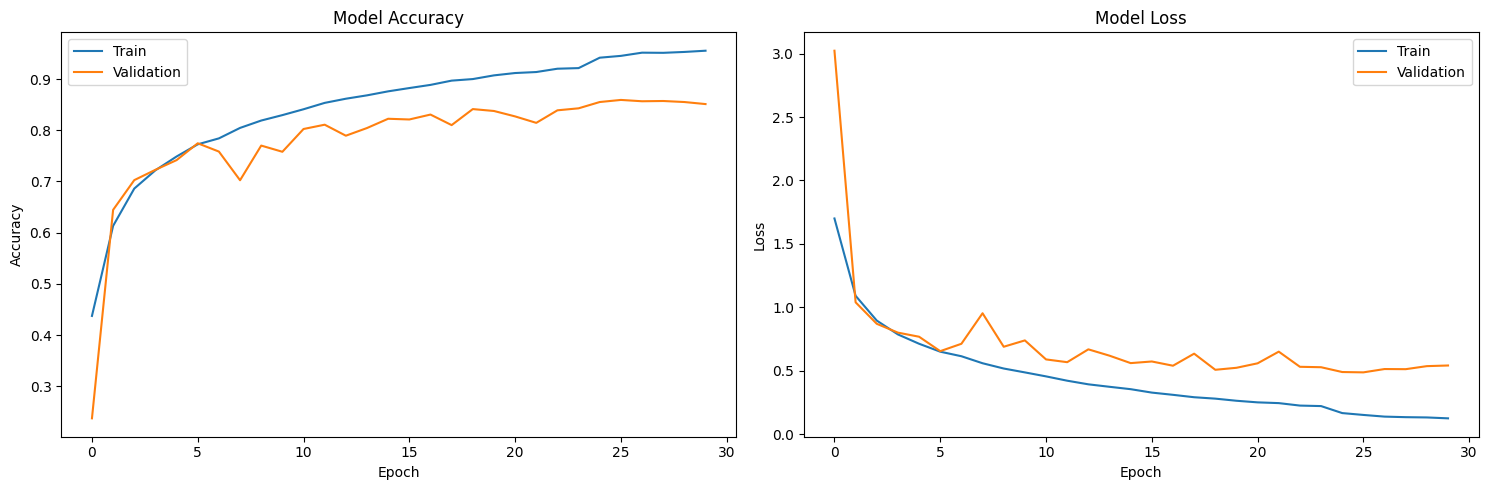

In [10]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'])

    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [12]:
# Function to predict single image
def predict_image(model, image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(32, 32)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    img_array = img_array.astype('float32') / 255.0

    # Make prediction
    predictions = model.predict(img_array)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    return predicted_class, confidence

In [11]:
# Save the model
model.save('cifar10_model.h5')
print("Model saved as 'cifar10_model.h5'")

Model saved as 'cifar10_model.h5'
